<a href="https://colab.research.google.com/github/jessietian19/2-HAD5016-S26/blob/main/r_Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Necessary Libraries



In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, recall_score, f1_score
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
uploaded = files.upload()

Saving Datathon_1_Dataset_1.csv to Datathon_1_Dataset_1 (4).csv


### 2. Load Data

In [ ]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['Datathon_1_Dataset_1 (4).csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

# Getting the shape of the dataframe, how many rows and columns
print(df.shape)

# List the columns of the dataframe
print(df.columns)

# Check for missing values in each column
print(df.isna().sum())

(1465, 13)
Index(['id', 'age', 'sex', 'air_pm25', 'alcohol', 'genetic_risk',
       'history_lungcnd', 'bmi', 'smoke_packyrs', 'smoke_passive',
       'history_chestpain', 'history_hemoptysis', 'severity'],
      dtype='object')
id                    0
age                   0
sex                   0
air_pm25              0
alcohol               0
genetic_risk          0
history_lungcnd       0
bmi                   0
smoke_packyrs         0
smoke_passive         0
history_chestpain     0
history_hemoptysis    0
severity              0
dtype: int64


### 3. Preprocessing Data / data cleaning



In [ ]:

# Preprocess the data
# Encoding 'severity' column into separte 'lung_cancer' variable where
# lambda function are anonymous, simple, one-time operations and good for use as inline arguments
df['lung_cancer'] = df['severity'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
# display(df.head())
# print(df.columns)
# print(df.shape)

# Display value counts of the new encoded column
# 1,162 lung cancer patients & 303 healthy individuals, which matches dataset information of assigment page
print(df['lung_cancer'].value_counts())

# Split data into features and label

X = df[['genetic_risk', 'smoke_passive', 'alcohol']]
y = df['lung_cancer']

# Split data into training and testing sets
# For smaller dataset, we split 70% for training 30% for test
# random_state set as we want to make randomization reproducable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Overall class proportion:\n", y.value_counts(normalize=True))
print("Train class proportion:\n", y_train.value_counts(normalize=True))
print("Test class proportion:\n", y_test.value_counts(normalize=True))


# # Scale the features
# # so mean of data is 0, sd = 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # learning distribution of cont variables, fit means learning parameters and applying parameters
X_test = scaler.transform(X_test) #apply only the parameters, best practice so that nothing from test set is used in training set

lung_cancer
1    1162
0     303
Name: count, dtype: int64
Overall class proportion:
 lung_cancer
1    0.793174
0    0.206826
Name: proportion, dtype: float64
Train class proportion:
 lung_cancer
1    0.793171
0    0.206829
Name: proportion, dtype: float64
Test class proportion:
 lung_cancer
1    0.793182
0    0.206818
Name: proportion, dtype: float64


/tmp/ipython-input-1311547069.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-1311547069.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-1311547069.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


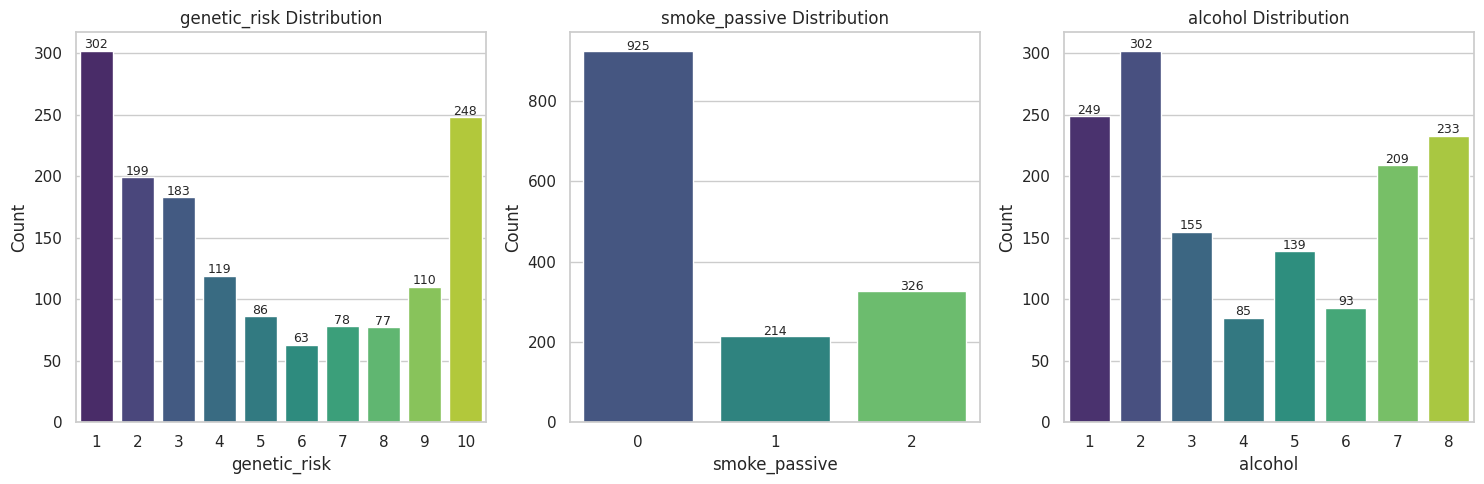

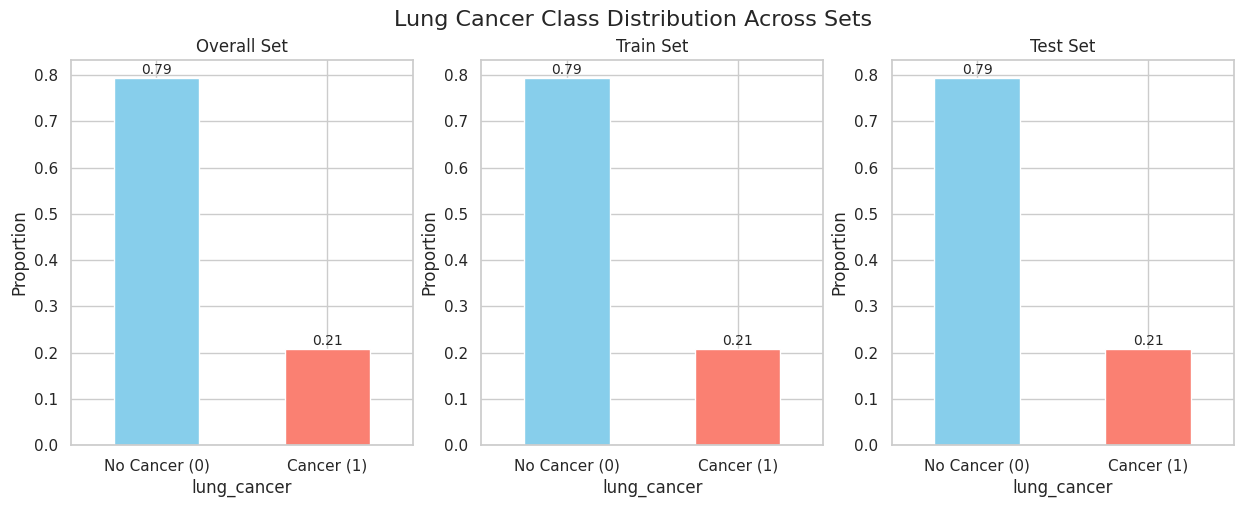

In [ ]:
# Data discription visalization
# Set seaborn style for consistent aesthetics
sns.set(style='whitegrid')

# 1. Feature distributions (genetic_risk, smoke_passive, alcohol)
columns_to_plot = ['genetic_risk', 'smoke_passive', 'alcohol']
plt.figure(figsize=(15,5))  # 1 row, 3 columns

for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    # Count plot for each feature
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    # Annotate counts on top of bars
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width()/2, p.get_height()+2, int(p.get_height()), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Lung cancer class distribution comparison across Overall, Train, and Test sets
# Calculate proportions for each set
proportions = {
    'Overall': y.value_counts(normalize=True),
    'Train': y_train.value_counts(normalize=True),
    'Test': y_test.value_counts(normalize=True)
}

fig, axes = plt.subplots(1, 3, figsize=(15,5))
colors = ['skyblue', 'salmon']

for ax, (title, counts) in zip(axes, proportions.items()):
    # Bar plot of class proportions
    counts.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{title} Set')
    ax.set_xticklabels(['No Cancer (0)','Cancer (1)'], rotation=0)
    ax.set_ylabel('Proportion')
    # Annotate proportions on top
    for i, val in enumerate(counts):
        ax.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=10)

plt.suptitle('Lung Cancer Class Distribution Across Sets', fontsize=16)
plt.show()



### 5. Apply KNN

Best K from CV: 7 CV Balanced Accuracy: 0.7798


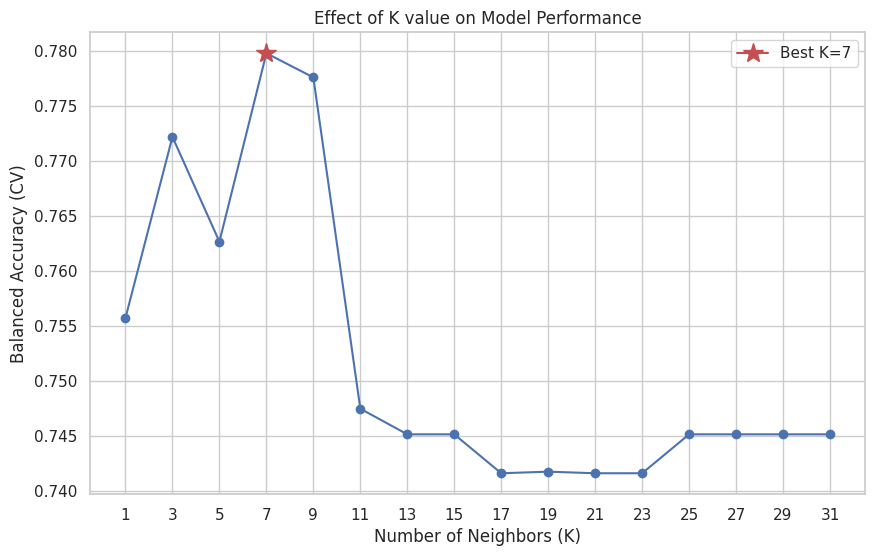


Comparison of K values on TEST set:
   K  Cancer_Recall  Balanced_Acc  Overall_Acc  F1_Score
0  5       0.911175      0.730313     0.836364  0.898305
1  7       0.885387      0.733902     0.822727  0.887931
2  9       0.899713      0.724582     0.827273  0.892045

Selected final K=5 

Predicted counts:
 1    359
0     81
Name: count, dtype: int64
Predicted percentages (%):
 1    81.59
0    18.41
Name: proportion, dtype: float64
Accuracy (%): 83.64
Balanced Accuracy (%): 73.03

Confusion Matrix:
 [[ 50  41]
 [ 31 318]]


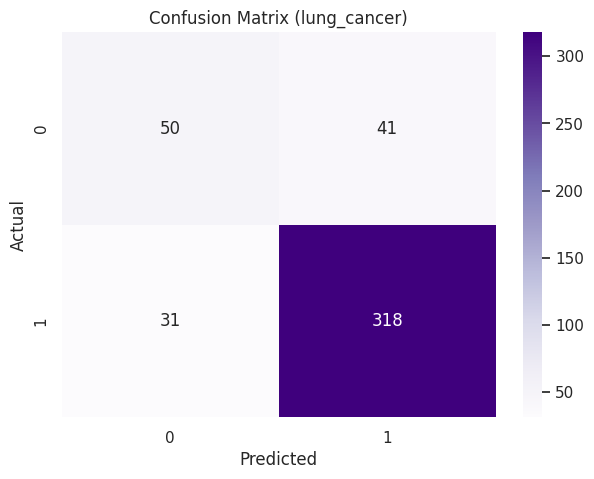


Classification Report:
               precision    recall  f1-score   support

           0      0.617     0.549     0.581        91
           1      0.886     0.911     0.898       349

    accuracy                          0.836       440
   macro avg      0.752     0.730     0.740       440
weighted avg      0.830     0.836     0.833       440



In [ ]:
# 1. Loop to find best K
k_values = range(1, 32, 2)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='balanced_accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)
print("Best K from CV:", best_k, "CV Balanced Accuracy:", round(best_score,4))

# Plot Balanced Accuracy for all K
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Effect of K value on Model Performance')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Balanced Accuracy (CV)')
plt.xticks(k_values)
plt.grid(True)
plt.plot(best_k, best_score, marker='*', color='r', markersize=15, label=f'Best K={best_k}')
plt.legend()
plt.show()


# 2. Compare fixed K values on TEST set (5, 7, 9)
report_k_list = [5, 7, 9]
target_pos_label = 1
results_list = []

for k in report_k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    bal_acc = balanced_accuracy_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=target_pos_label, average='binary')
    f1 = f1_score(y_test, y_pred, pos_label=target_pos_label, average='binary')

    results_list.append({
        'K': k,
        'Cancer_Recall': recall,
        'Balanced_Acc': bal_acc,
        'Overall_Acc': acc,
        'F1_Score': f1
    })

results_df = pd.DataFrame(results_list)
print("\nComparison of K values on TEST set:")
print(results_df)

# 3. Decide final K
# If Balanced Accuracy difference < 0.01, choose the one with higher Cancer Recall
balanced_acc_threshold = 0.01
best_k_candidates = results_df[results_df['Balanced_Acc'] >= results_df['Balanced_Acc'].max() - balanced_acc_threshold]
final_k_row = best_k_candidates.loc[best_k_candidates['Cancer_Recall'].idxmax()]
final_k = int(final_k_row['K'])
print(f"\nSelected final K={final_k} ")


# 4. Final Model Evaluation
final_knn = KNeighborsClassifier(n_neighbors=final_k, weights="distance", metric='euclidean')
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

# Prediction distribution
pred_counts = pd.Series(y_pred).value_counts()
pred_perc = pd.Series(y_pred).value_counts(normalize=True) * 100
print("\nPredicted counts:\n", pred_counts)
print("Predicted percentages (%):\n", pred_perc.round(2))

# Evaluation
print("Accuracy (%):", round(accuracy_score(y_test, y_pred)*100,2))
print("Balanced Accuracy (%):", round(balanced_accuracy_score(y_test, y_pred)*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
classes = df['lung_cancer'].unique()
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (lung_cancer)')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

